# Netflix Shows : An Analytical

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
filePath = 'netflix_titles.csv'

In [3]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are some null values on categorics column

In [4]:
# Change date type to datetime

df.date_added = pd.to_datetime(df.date_added)
df.release_year = pd.to_datetime(df.release_year).dt.year

In [5]:
# Lets ignore the nulls first

df2 = df.dropna()
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1970,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,1970,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,1970,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1970,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


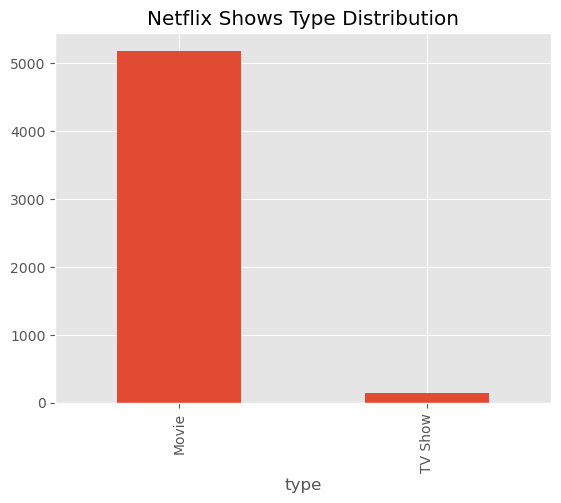

In [6]:
df2.groupby('type')['title'].count().plot.bar()
plt.title('Netflix Shows Type Distribution')
plt.show()

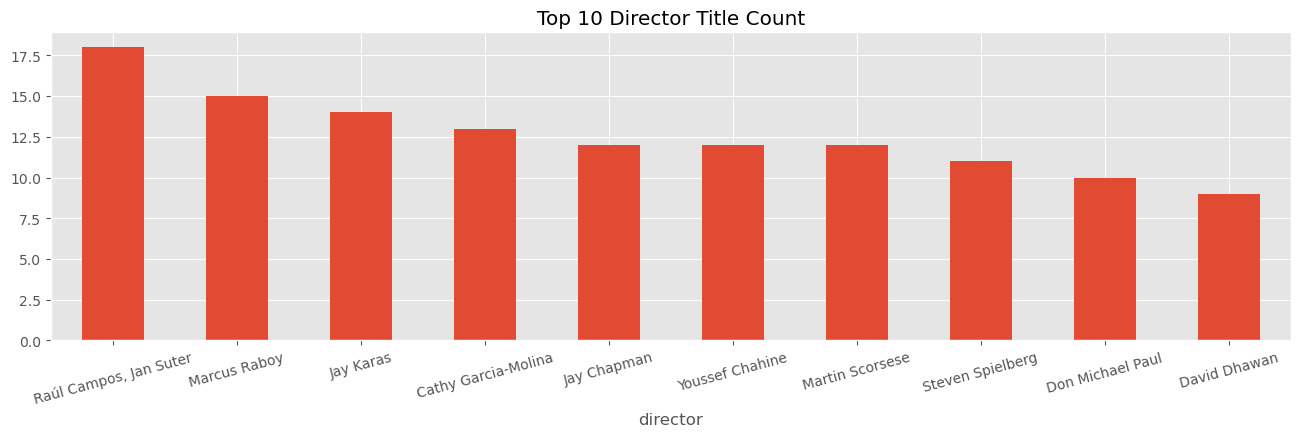

In [7]:
plt.figure(figsize=(16,4))
df2.groupby('director')['title'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Director Title Count')
plt.xticks(rotation=15)
plt.show()

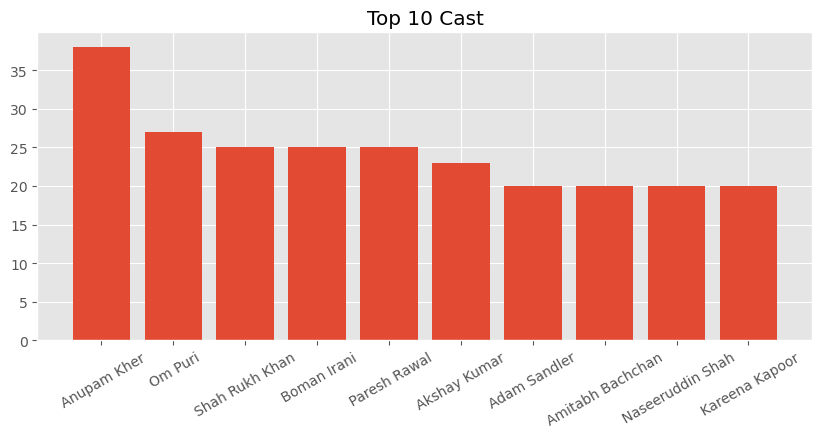

In [8]:
cast = {}

for artists in list(df2.cast.apply(lambda x: x.split(',')).values):
    for name in artists:
        if name not in cast:
            cast[name] = 1
        elif name in cast:
            cast[name]+=1

cast = (sorted(cast.items(),key= lambda x:x[1],reverse=True))

used_data = dict(cast[:10])

plt.figure(figsize=(10,4))
plt.bar(range(len(used_data)),list(used_data.values()),tick_label=list(used_data.keys()))
plt.title('Top 10 Cast')
plt.xticks(rotation=30)
plt.show()
# used_data

Its seems Most Cast name are not from west

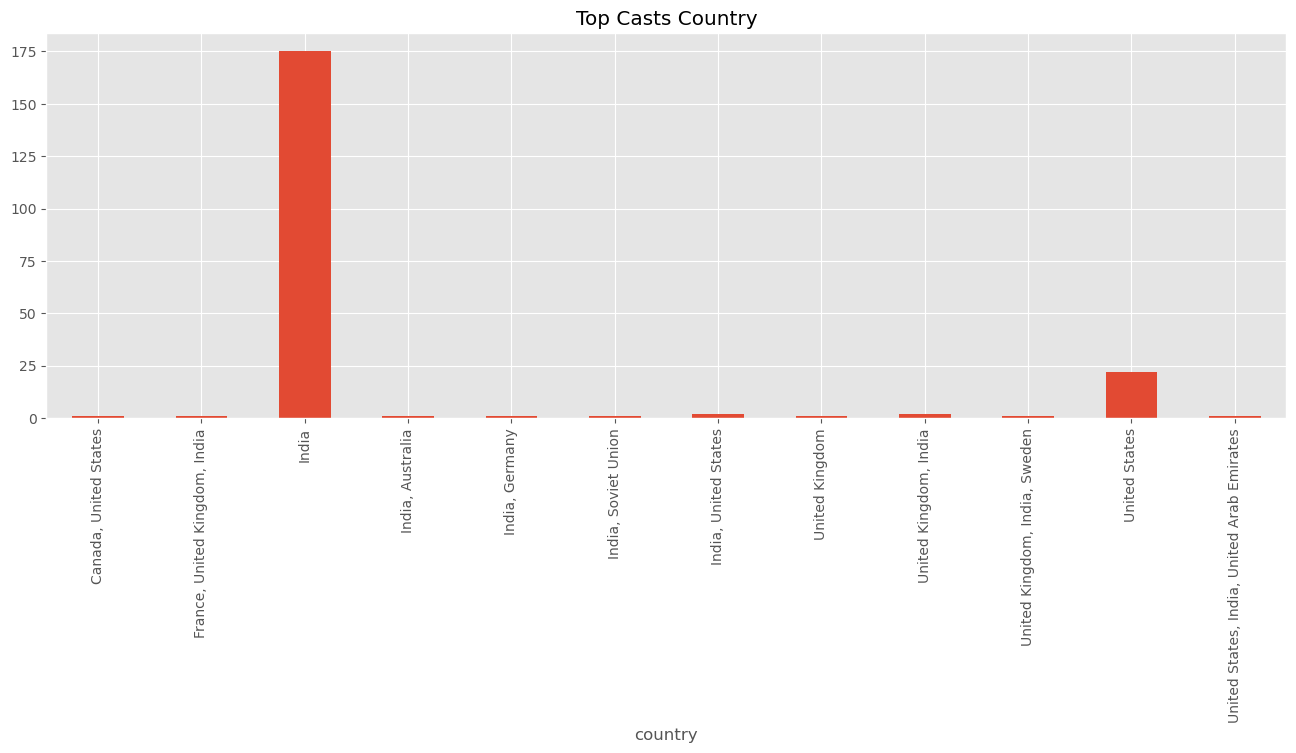

In [9]:
plt.figure(figsize=(16,5))
df2[df2.cast.str.contains('|'.join(list(used_data.keys())))].groupby('country')['title'].count().plot.bar()
plt.title('Top Casts Country')
plt.show()

They were indeed not from west. Most of them were from India or  most of them were starring movies that has india as their location

In [10]:
# Take a look onto type and duration

df2[['show_id','type','duration']]

,show_id,type,duration
7,s8,Movie,125 min
8,s9,TV Show,9 Seasons
9,s10,Movie,104 min
12,s13,Movie,127 min
24,s25,Movie,166 min
...,...,...,...
8801,s8802,Movie,96 min
8802,s8803,Movie,158 min
8804,s8805,Movie,88 min
8805,s8806,Movie,88 min


It's unclear about tv shows's duration. There is no detail duration for each season

In [30]:
df2[df2.type == 'Movie'].duration.apply(lambda x: int(x.replace('min',''))).mean()

102.70144648023144

C:\Users\intel\AppData\Local\Temp\ipykernel_12336\411502436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['added_month']=df2.date_added.dt.to_period('M')


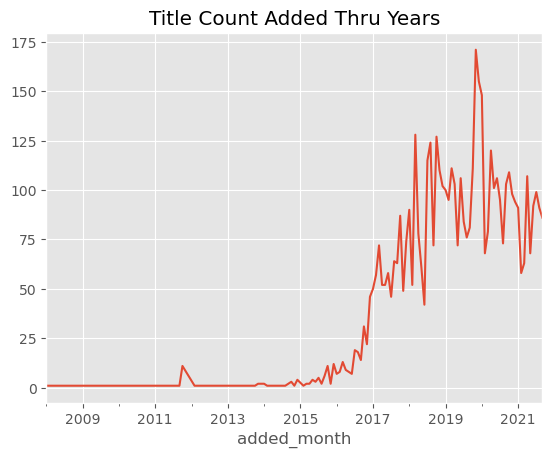

In [11]:
df2['added_month']=df2.date_added.dt.to_period('M')

df2.groupby('added_month')['title'].count().plot()
plt.title('Title Count Added Thru Years')
plt.show()

In [12]:
df2.groupby('release_year')['title'].count()

release_year
1970    5332
Name: title, dtype: int64

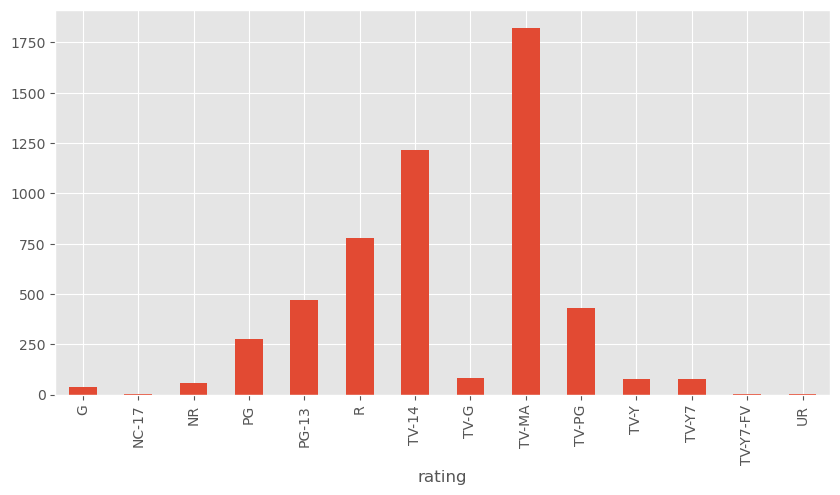

In [13]:
plt.figure(figsize=(10,5))
df2.groupby('rating')['title'].count().plot.bar()

plt.show()

In [15]:
from wordcloud import WordCloud

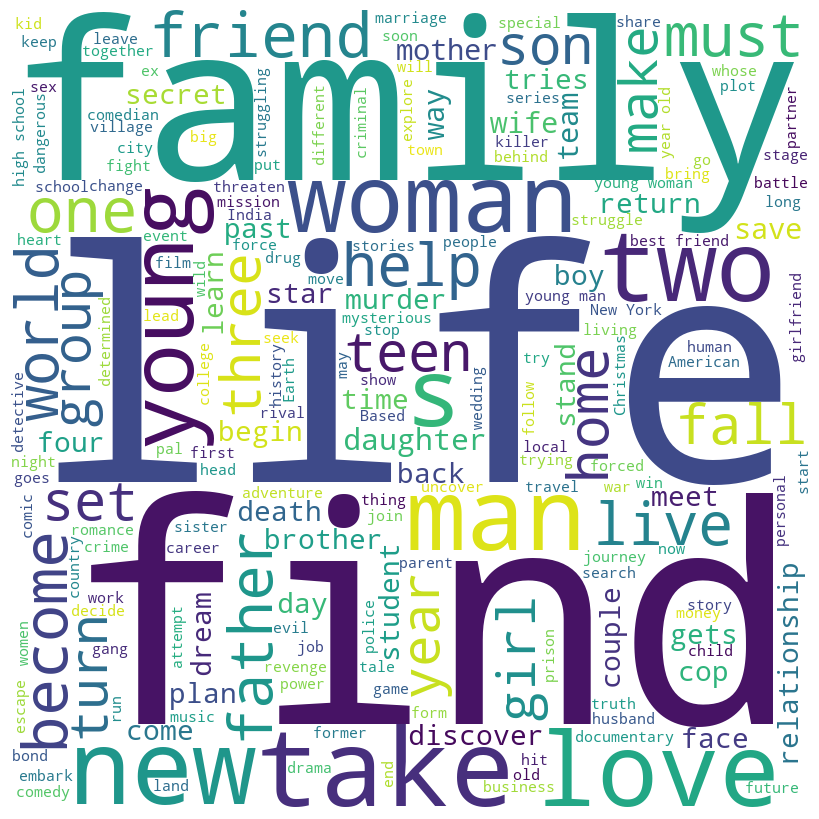

In [16]:
# Using WordCloud to show description

all_description =' '.join(df2['description'])

wc = WordCloud(width=800, height=800, background_color='white').generate(all_description)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [17]:
df2[df2.cast.str.contains('Anupam Kher')][['type','rating']].value_counts()

type   rating
Movie  TV-14     27
       TV-MA      6
       TV-PG      6
       R          2
       PG         1
dtype: int64

Anupam Kher as the most starring title was only starring Movie type Shows and mostly rated with TV-14 (<14)

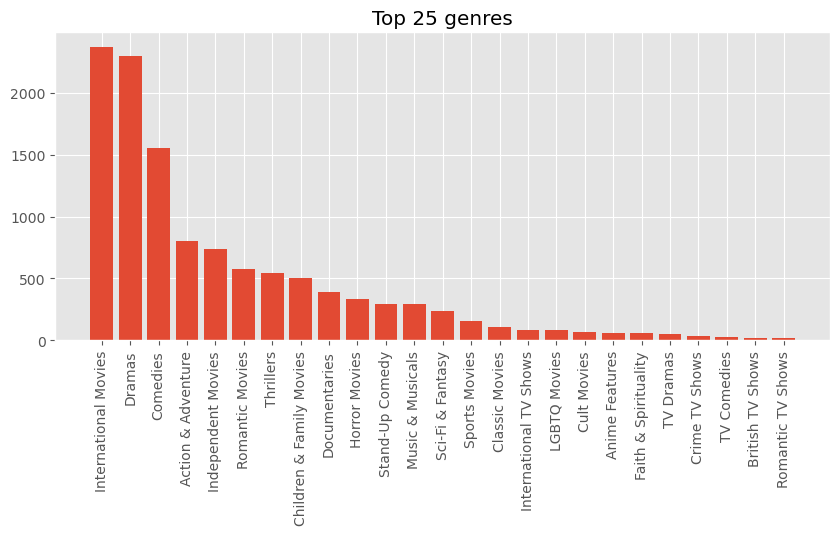

In [18]:
# Now lets take a look to genre 

genres = {}

for artists in list(df2.listed_in.apply(lambda x: x.replace(', ',',').split(',')).values):
    for name in artists:
        if name not in genres:
            genres[name] = 1
        elif name in genres:
            genres[name]+=1

genres = (sorted(genres.items(),key= lambda x:x[1],reverse=True))


used_data = dict(genres[:25])

plt.figure(figsize=(10,4))
plt.bar(range(len(used_data)),list(used_data.values()),tick_label=list(used_data.keys()))
plt.title('Top 25 genres')
plt.xticks(rotation=90)
plt.show()
# used_data

In [19]:
# Im curious about thrillers

df2[df2.listed_in.str.contains('Thrillers')].rating.value_counts()

TV-MA    229
R        152
TV-14    105
PG-13     53
TV-PG      5
NR         4
PG         2
Name: rating, dtype: int64

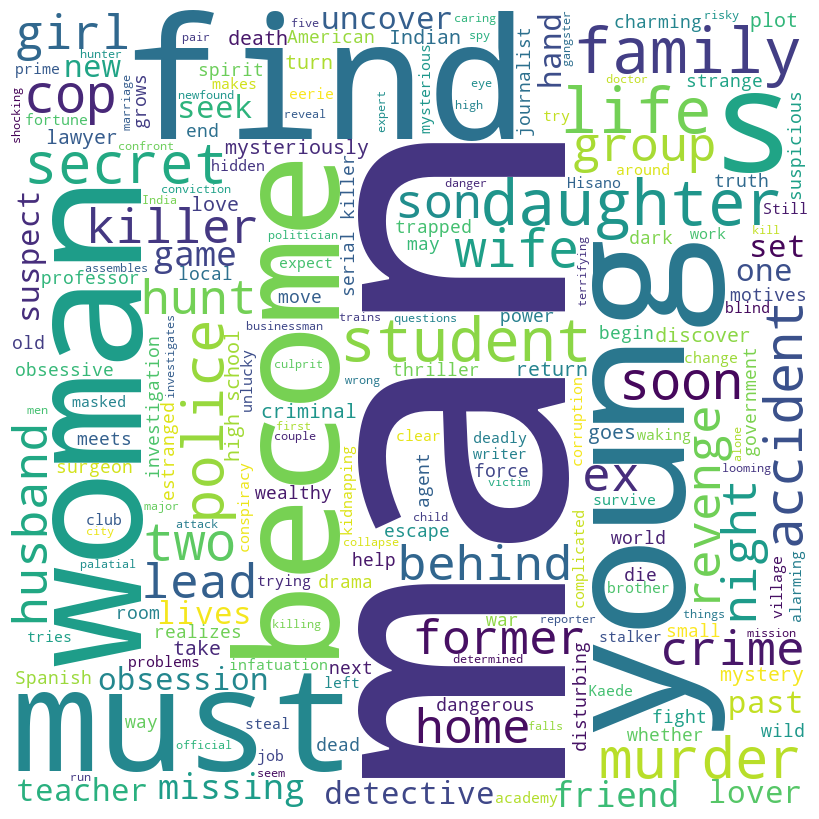

In [23]:
thrill_description =' '.join(df2[(df2.listed_in.str.contains('Thrillers')) & (df2.rating == 'TV-14')].description)

wc = WordCloud(width=800, height=800, background_color='white').generate(thrill_description)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()